# Final Project Checkpoint

## Seed Zones Data

In [32]:
import pandas as pd

seed_zone_df = pd.read_csv("ca-seed-zones.csv")
seed_zone_df

FileNotFoundError: [Errno 2] No such file or directory: 'ca-seed-zones.csv'

In [33]:
seed_zone_df['SEED_ZONE'].unique()

NameError: name 'seed_zone_df' is not defined

## CA Weather and Fire From 1984-2025

In [34]:
import pandas as pd
df = pd.read_csv("CA_Weather_Fire_Dataset_1984-2025.csv")

   SEASON  FIRE_START_DAY
3  Winter        7.325613
1  Spring       21.606575
2  Summer       68.584305
0    Fall       34.762798


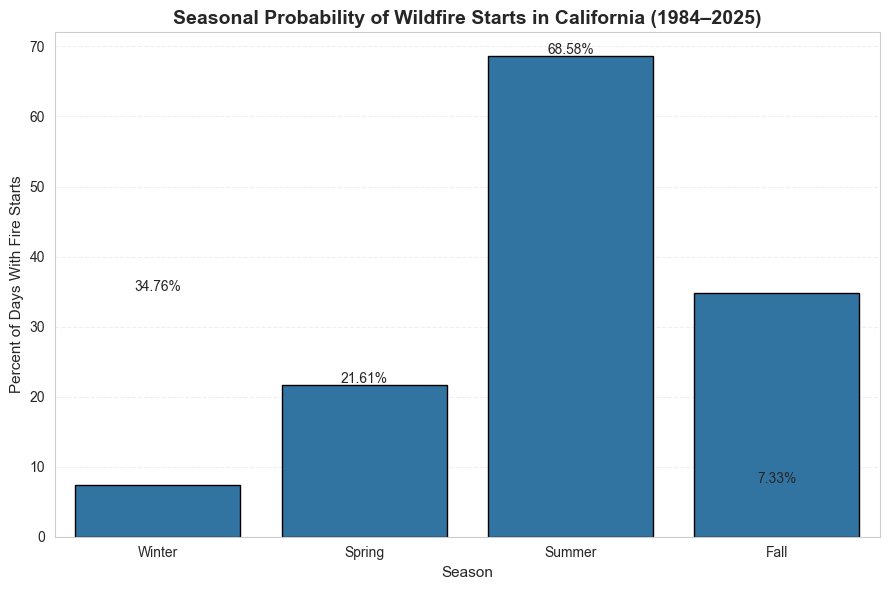

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure FIRE_START_DAY is binary (0/1)
df["FIRE_START_DAY"] = df["FIRE_START_DAY"].astype(int)

# ============================
# 2. COMPUTE % FIRE DAYS BY SEASON
# ============================

seasonal_fire_rate = (
    df.groupby("SEASON")["FIRE_START_DAY"]
      .mean() * 100
).reset_index()

# Ensure correct seasonal order
season_order = ["Winter", "Spring", "Summer", "Fall"]
seasonal_fire_rate["SEASON"] = pd.Categorical(
    seasonal_fire_rate["SEASON"],
    categories=season_order,
    ordered=True
)

seasonal_fire_rate = seasonal_fire_rate.sort_values("SEASON")

print(seasonal_fire_rate)

# ============================
# 3. PLOT — SEASONAL FIRE STARTS
# ============================

plt.figure(figsize=(9, 6))

sns.barplot(
    data=seasonal_fire_rate,
    x="SEASON",
    y="FIRE_START_DAY",
    edgecolor="black"
)

# Labels & styling
plt.title("Seasonal Probability of Wildfire Starts in California (1984–2025)", fontsize=14, weight="bold")
plt.xlabel("Season", fontsize=11)
plt.ylabel("Percent of Days With Fire Starts", fontsize=11)

# Add value labels on bars
for i, row in seasonal_fire_rate.iterrows():
    plt.text(
        i,
        row["FIRE_START_DAY"] + 0.3,
        f"{row['FIRE_START_DAY']:.2f}%",
        ha="center",
        fontsize=10
    )

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

# ============================
# 4. SAVE FOR YOUR WEBSITE
# ============================

plt.savefig("seasonal_fire_starts.png", dpi=200)
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("CA_Weather_Fire_Dataset_1984-2025.csv")

# Ensure FIRE_START_DAY is binary
df["FIRE_START_DAY"] = df["FIRE_START_DAY"].astype(int)

sns.set_style("whitegrid")

/var/folders/q2/cgg1l8w16k1g8gr2znypm6sr0000gn/T/ipykernel_18947/2565559649.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_fire_rate = df.groupby("TEMP_BIN")["FIRE_START_DAY"].mean() * 100


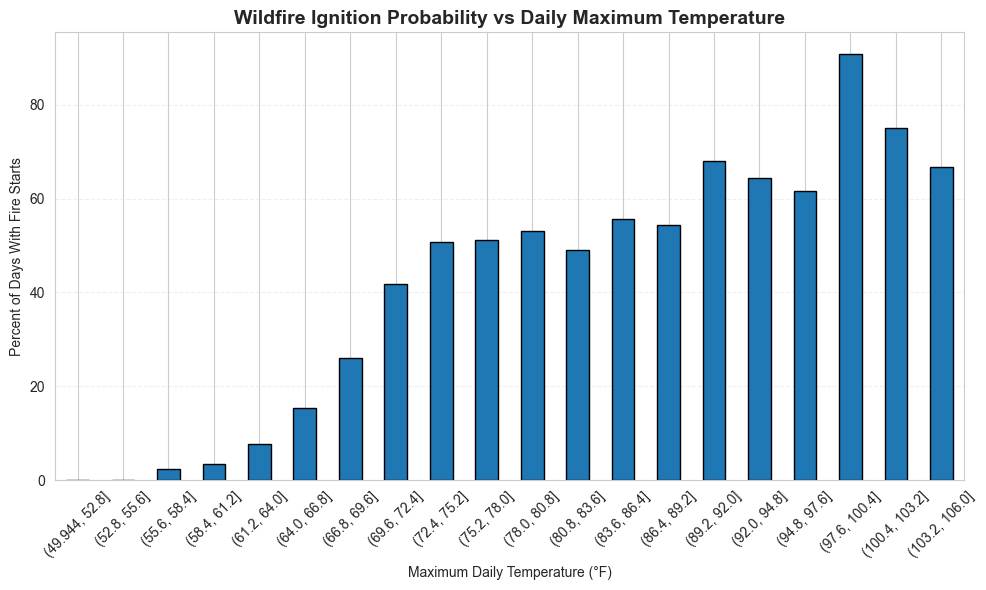

In [37]:
# Bin temperatures
df["TEMP_BIN"] = pd.cut(df["MAX_TEMP"], bins=20)

temp_fire_rate = df.groupby("TEMP_BIN")["FIRE_START_DAY"].mean() * 100

# Plot
plt.figure(figsize=(10, 6))
temp_fire_rate.plot(kind="bar", edgecolor="black")

plt.title("Wildfire Ignition Probability vs Daily Maximum Temperature", fontsize=14, weight="bold")
plt.xlabel("Maximum Daily Temperature (°F)")
plt.ylabel("Percent of Days With Fire Starts")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

plt.savefig("fire_vs_temperature.png", dpi=200)
plt.show()

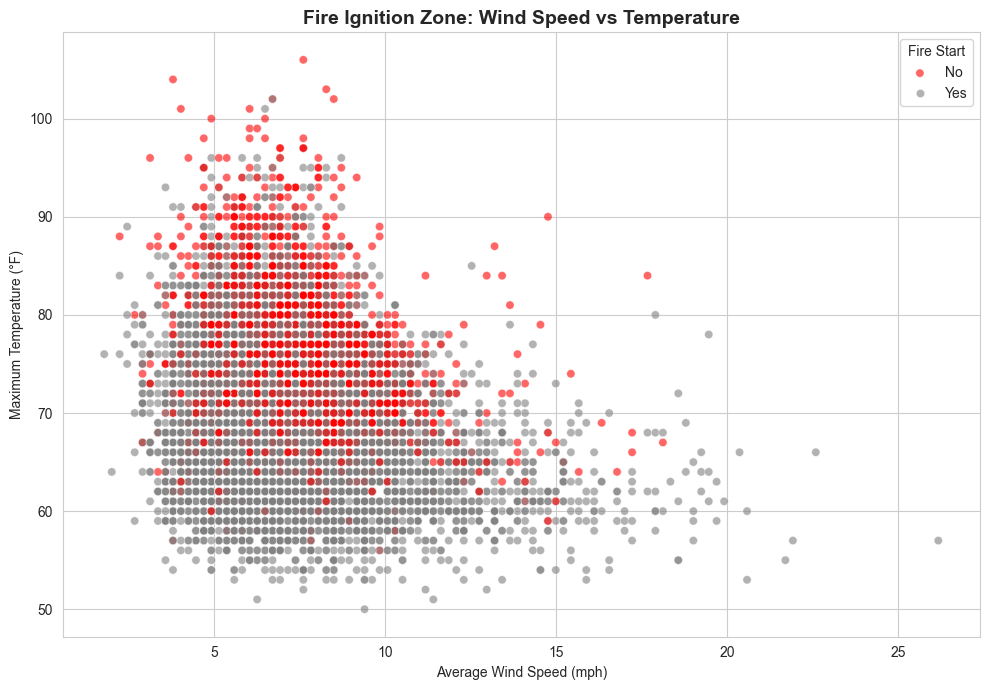

In [38]:
plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=df.sample(12000),  # subsample for speed
    x="AVG_WIND_SPEED",
    y="MAX_TEMP",
    hue="FIRE_START_DAY",
    alpha=0.6,
    palette={0: "gray", 1: "red"}
)

plt.title("Fire Ignition Zone: Wind Speed vs Temperature", fontsize=14, weight="bold")
plt.xlabel("Average Wind Speed (mph)")
plt.ylabel("Maximum Temperature (°F)")
plt.legend(title="Fire Start", labels=["No", "Yes"])
plt.tight_layout()

plt.savefig("wind_vs_temperature_fire.png", dpi=200)
plt.show()


/var/folders/q2/cgg1l8w16k1g8gr2znypm6sr0000gn/T/ipykernel_18947/2254362000.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rain_fire_rate = df.groupby("RAIN_BIN")["FIRE_START_DAY"].mean() * 100


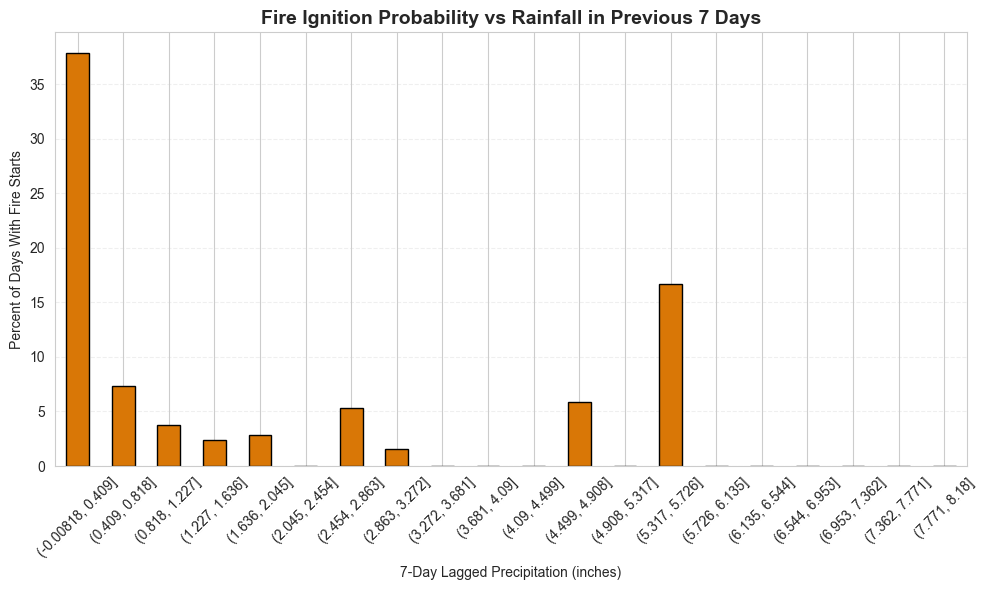

In [39]:
# Bin lagged precipitation
df["RAIN_BIN"] = pd.cut(df["LAGGED_PRECIPITATION"], bins=20)

rain_fire_rate = df.groupby("RAIN_BIN")["FIRE_START_DAY"].mean() * 100

plt.figure(figsize=(10, 6))
rain_fire_rate.plot(kind="bar", edgecolor="black", color="#d97706")

plt.title("Fire Ignition Probability vs Rainfall in Previous 7 Days", fontsize=14, weight="bold")
plt.xlabel("7-Day Lagged Precipitation (inches)")
plt.ylabel("Percent of Days With Fire Starts")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

plt.savefig("fire_vs_dryness.png", dpi=200)
plt.show()


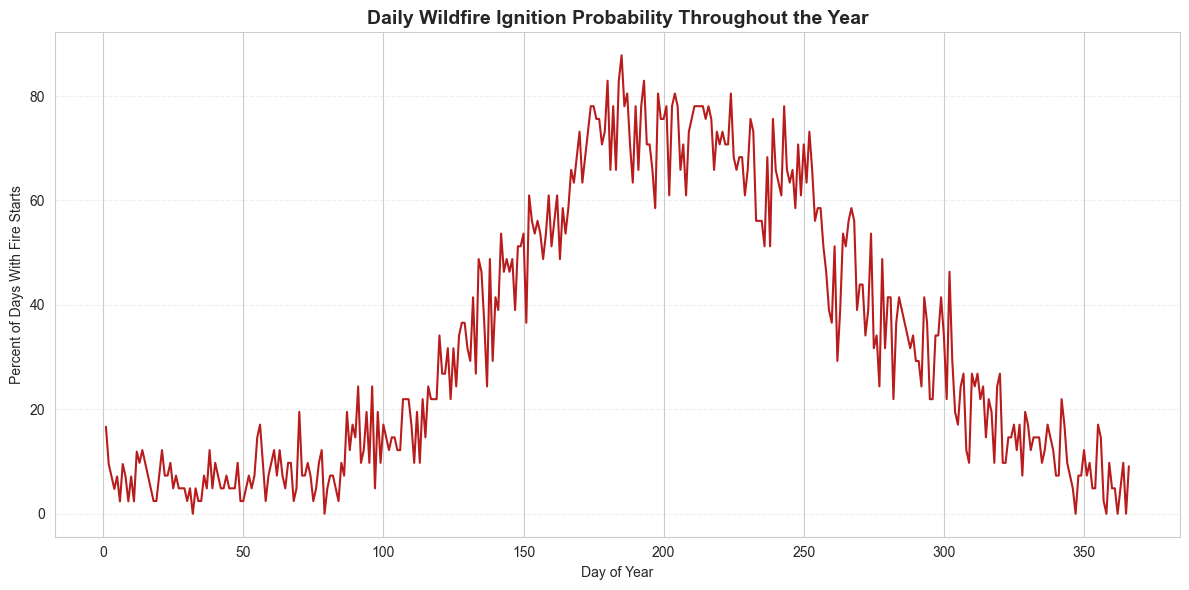

In [40]:
calendar_fire_rate = df.groupby("DAY_OF_YEAR")["FIRE_START_DAY"].mean() * 100

plt.figure(figsize=(12, 6))
calendar_fire_rate.plot(color="#b91c1c")

plt.title("Daily Wildfire Ignition Probability Throughout the Year", fontsize=14, weight="bold")
plt.xlabel("Day of Year")
plt.ylabel("Percent of Days With Fire Starts")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()

plt.savefig("fire_calendar_year.png", dpi=200)
plt.show()


## Combining GeoJsons

In [42]:
import geopandas as gpd

seed = gpd.read_file("ca-seed-zones.geojson")
fires = gpd.read_file("/Users/miekochun/Desktop/DSC106/final-project/dsc106-final-project/final/fire-perimeters.geojson")
veg = gpd.read_file("rare-vegetation.geojson")

In [44]:
seed = seed.to_crs("EPSG:3310")
fires = fires.to_crs("EPSG:3310")
veg = veg.to_crs("EPSG:3310")

In [45]:
fires["YEAR_"] = pd.to_numeric(fires["YEAR_"], errors="coerce")

In [46]:
fire_intersect = gpd.overlay(seed, fires, how="intersection")

print(fire_intersect.columns)

fire_intersect["burned_km2"] = fire_intersect.geometry.area / 1_000_000

fire_stats = fire_intersect.groupby("SEED_ZONE").agg(
    total_fire_count=("OBJECTID_2", "count"),      # ✅ fire count
    total_burned_area_km2=("burned_km2", "sum"),   # ✅ area burned
    last_fire_year=("YEAR_", "max")                # ✅ most recent fire
).reset_index()

Index(['OBJECTID_1', 'SEED_ZONE', 'REGION', 'SUBREGION', 'SUBZONE', 'GlobalID',
       'OBJECTID_2', 'YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME',
       'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE',
       'GIS_ACRES', 'COMMENTS', 'COMPLEX_NAME', 'IRWINID', 'FIRE_NUM',
       'COMPLEX_ID', 'DECADES', 'geometry'],
      dtype='object')


In [47]:
veg_intersect = gpd.overlay(seed, veg, how="intersection")

veg_intersect["rare_km2"] = veg_intersect.geometry.area / 1_000_000

veg_stats = veg_intersect.groupby("SEED_ZONE").agg(
    rare_vegetation_area_km2=("rare_km2", "sum")
).reset_index()

In [48]:
seed["zone_area_km2"] = seed.geometry.area / 1_000_000

In [49]:
master = (
    seed.merge(fire_stats, on="SEED_ZONE", how="left")
        .merge(veg_stats, on="SEED_ZONE", how="left")
)

# Fill missing values safely
master["total_fire_count"] = master["total_fire_count"].fillna(0)
master["total_burned_area_km2"] = master["total_burned_area_km2"].fillna(0)
master["rare_vegetation_area_km2"] = master["rare_vegetation_area_km2"].fillna(0)

In [50]:
master["mean_fire_density"] = (
    master["total_fire_count"] / master["zone_area_km2"]
)

master["percent_zone_rare_veg"] = (
    master["rare_vegetation_area_km2"] / master["zone_area_km2"] * 100
)

In [51]:
def get_region(z):
    z = int(z)
    if 90 <= z < 100: return "North Coast Redwood"
    if 100 <= z < 200: return "Central Coast"
    if 300 <= z < 400: return "North Coast Interior"
    if 500 <= z < 600: return "West Slope Cascades–Sierra"
    if 700 <= z < 800: return "East Slope Cascades–Sierra"
    if 950 <= z < 960: return "Great Basin"
    if 960 <= z < 970: return "Central Valley"
    if 980 <= z < 990: return "SoCal Desert"
    if 990 <= z < 1000: return "SoCal Mountains"
    return "Unknown"

master["physio_region"] = master["SEED_ZONE"].apply(get_region)

In [52]:
# ✅ Full GeoJSON for all maps
master.to_file("seed_zone_fire_veg.geojson", driver="GeoJSON")

# ✅ Clean CSV for charts
master.drop(columns="geometry").to_csv(
    "seed_zone_fire_veg.csv", index=False
)

print("✅ DONE: seed_zone_fire_veg.geojson and seed_zone_fire_veg.csv created")

✅ DONE: seed_zone_fire_veg.geojson and seed_zone_fire_veg.csv created


In [58]:
import pandas as pd

df = pd.read_csv("/Users/miekochun/Desktop/DSC106/final-project/dsc106-final-project/prototype/seed_zone_fire_veg.csv")

agg = df.groupby("physio_region").agg(
    total_fires=("total_fire_count", "sum"),
    mean_density=("mean_fire_density", "mean"),
    mean_rare_veg=("percent_zone_rare_veg", "mean")
).reset_index()

agg.to_csv("physio_summary.csv", index=False)
